# New book chapter 3 and 4 solutions

## Chapter 3 Computational exercises

3.1: 1. Using  the  bisection  method,  determine  the  point  of intersection  of the  curves  given  by  $y =  x^3 —  2x  +  1$ and $y = x^2$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def bisection_method(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) >= 0:
        raise ValueError("Bisection method requires a change of sign over the interval.")
    
    iterations = 0
    while (b - a) / 2 > tol and iterations < max_iter:
        c = (a + b) / 2  
        if f(c) == 0:
            return c  
        elif f(a) * f(c) < 0:
            b = c  
        else:
            a = c  
        iterations += 1
    
    return (a + b) / 2 

In [3]:
def f(x):
    return x**3 - x**2 - 2*x + 1

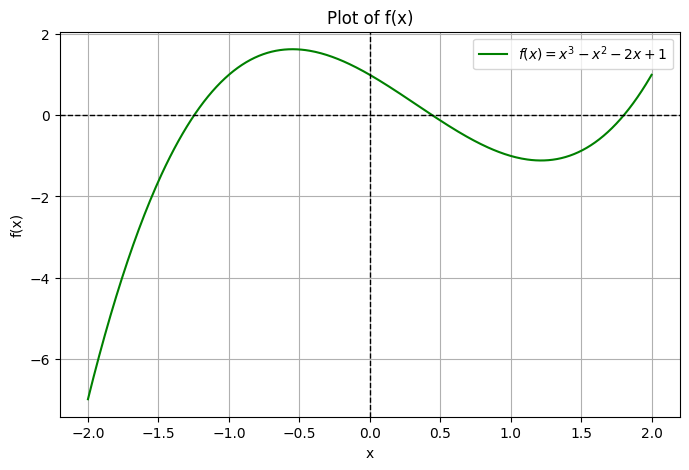

In [8]:
x_vals = np.linspace(-2, 2, 400)
f_vals = f(x_vals)

# Plot f(x) to see where the roots are approximately located
plt.figure(figsize=(8, 5))
plt.plot(x_vals, f_vals, label=r'$f(x) = x^3 - x^2 - 2x + 1$', color='g')
plt.axhline(0, color='black', linewidth=1, linestyle='--')
plt.axvline(0, color='black', linewidth=1, linestyle='--')  
plt.grid()
plt.legend()
plt.title("Plot of f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.show()

In [5]:
root1 = bisection_method(f, -2, -1)
root2 = bisection_method(f, 0, 1)
root3 = bisection_method(f, 1, 2)

print("Intersection points (x-values):", root1, root2, root3)

Intersection points (x-values): -1.2469797134399414 0.44504261016845703 1.8019380569458008


3.2: 11. Write  and  test  a  recursive  procedure  for  Newton’s  
method. 

In [16]:
def newton_recursive(f, df, x0, tol=1e-10, max_iter=100, iteration=0):
    fx = f(x0)
    dfx = df(x0)
    
    if abs(fx) < tol or iteration >= max_iter:
        return x0
    x1 = x0 - fx / dfx
    return newton_recursive(f, df, x1, tol, max_iter, iteration + 1)


In [17]:
def f(x):
    return x**3 - x - 2 

def df(x):
    return 3*x**2 - 1 

initial_guess = 1.5
root = newton_recursive(f, df, initial_guess)
print(f"Approximate root: {root}")

Approximate root: 1.5213797068045751


## Chapter 4 Computational exercises

4.1: 2. Find the polynomial of degree 10 that interpolates the function $arctan x$ at 11 equally spaced points in the interval $[1,6]$. Print the coefficients in the Newton form of the polynomial. Compute and print the difference between the polynomial and the function at 33 equally spaced points in the interval $[0,8]$. What conclusion can be drawn?


In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def divided_differences(x, y):
    n = len(y)
    coef = np.array(y, dtype=float)
    
    for j in range(1, n):
        coef[j:n] = (coef[j:n] - coef[j - 1]) / (x[j:n] - x[j - 1])
    
    return coef

In [21]:
def newton_polynomial(coef, x_data, x):
    n = len(coef)
    poly = coef[-1]
    
    for k in range(n - 2, -1, -1):
        poly = coef[k] + (x - x_data[k]) * poly
    
    return poly

In [22]:
x_data = np.linspace(1, 6, 11)
y_data = np.arctan(x_data)

coef = divided_differences(x_data, y_data)

x_test = np.linspace(0, 8, 33)
y_actual = np.arctan(x_test)
y_interp = np.array([newton_polynomial(coef, x_data, x) for x in x_test])
error = np.abs(y_actual - y_interp)

print("Newton Interpolation Coefficients:", coef)
print("\nErrors at 33 points:", error)


Newton Interpolation Coefficients: [ 7.85398163e-01  3.94791120e-01 -1.46081131e-01  4.24357369e-02
 -9.99896611e-03  1.93348734e-03 -3.02947549e-04  3.59311603e-05
 -2.27131833e-06 -2.85026534e-07  1.37916618e-07]

Errors at 33 points: [1.05316315e-01 3.18980266e-02 7.25132751e-03 1.03413551e-03
 0.00000000e+00 3.45774066e-05 0.00000000e+00 3.94586684e-06
 0.00000000e+00 8.76922627e-07 0.00000000e+00 3.21874010e-07
 0.00000000e+00 1.81110350e-07 0.00000000e+00 1.51122549e-07
 0.00000000e+00 1.86047534e-07 0.00000000e+00 3.45709414e-07
 2.22044605e-16 1.03388139e-06 0.00000000e+00 5.82840987e-06
 2.22044605e-16 1.10047721e-04 6.22477571e-04 2.29533964e-03
 6.79996694e-03 1.74749425e-02 4.05148159e-02 8.67665045e-02
 1.74351597e-01]


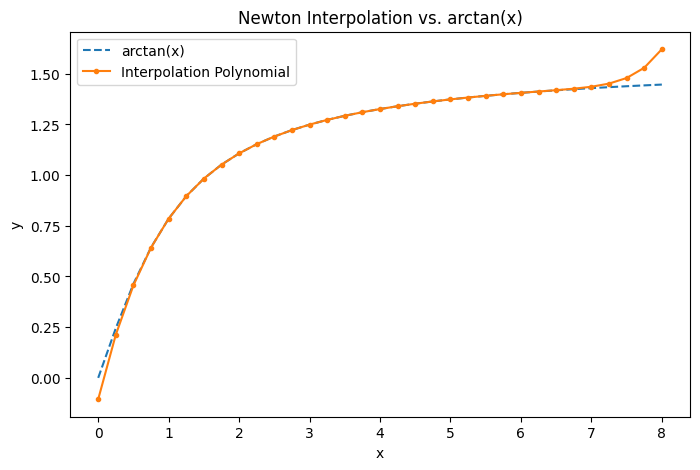

In [23]:
plt.figure(figsize=(8, 5))
plt.plot(x_test, y_actual, label="arctan(x)", linestyle='dashed')
plt.plot(x_test, y_interp, label="Interpolation Polynomial", marker='o', markersize=3)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Newton Interpolation vs. arctan(x)")
plt.show()

4.2: 1.  Using  21  equally  spaced  nodes  on  the  interval  [—5,  5],  
find  the  interpolating  polynomial  p of degree  20 for  the  
function  $f(x)  =  (x^2+1)^{-1}$.  Print  the values  of $f(x)$ and  
$p(x)$  at  41  equally  spaced  points,  including  the  nodes.  
Observe  the  large  discrepancy  between  $f(x)$  and  $p(x)$. 

In [25]:
def f(x):
    return 1 / (x**2 + 1)

In [26]:
n_nodes = 21
x_nodes = np.linspace(-5, 5, n_nodes)
y_nodes = f(x_nodes)

coef = divided_differences(x_nodes, y_nodes)

n_eval = 41
x_eval = np.linspace(-5, 5, n_eval)
y_actual = f(x_eval)
y_interp = np.array([newton_polynomial(coef, x_nodes, x) for x in x_eval])

print("x values\tf(x)\tp(x)")
for x, fa, pa in zip(x_eval, y_actual, y_interp):
    print(f"{x:.3f}\t{fa:.6f}\t{pa:.6f}")

x values	f(x)	p(x)
-5.000	0.038462	0.038462
-4.750	0.042440	-39.952449
-4.500	0.047059	0.047059
-4.250	0.052459	3.454958
-4.000	0.058824	0.058824
-3.750	0.066390	-0.447052
-3.500	0.075472	0.075472
-3.250	0.086486	0.202423
-3.000	0.100000	0.100000
-2.750	0.116788	0.080660
-2.500	0.137931	0.137931
-2.250	0.164948	0.179763
-2.000	0.200000	0.200000
-1.750	0.246154	0.238446
-1.500	0.307692	0.307692
-1.250	0.390244	0.395093
-1.000	0.500000	0.500000
-0.750	0.640000	0.636755
-0.500	0.800000	0.800000
-0.250	0.941176	0.942490
0.000	1.000000	1.000000
0.250	0.941176	0.942490
0.500	0.800000	0.800000
0.750	0.640000	0.636755
1.000	0.500000	0.500000
1.250	0.390244	0.395093
1.500	0.307692	0.307692
1.750	0.246154	0.238446
2.000	0.200000	0.200000
2.250	0.164948	0.179763
2.500	0.137931	0.137931
2.750	0.116788	0.080660
3.000	0.100000	0.100000
3.250	0.086486	0.202423
3.500	0.075472	0.075472
3.750	0.066390	-0.447052
4.000	0.058824	0.058824
4.250	0.052459	3.454958
4.500	0.047059	0.047059
4.750	0.042440	-39.95

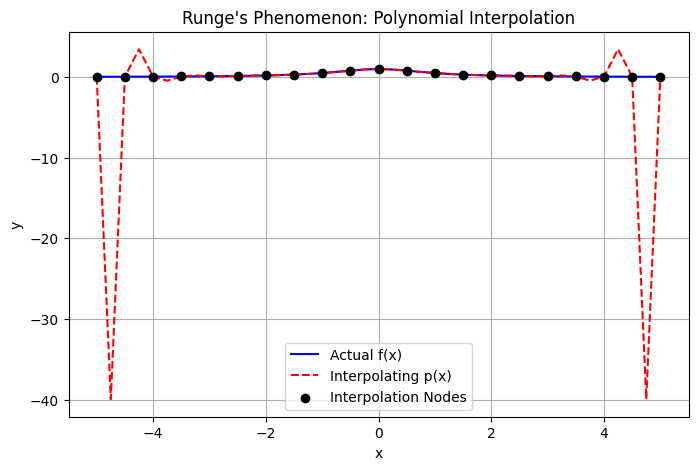

In [27]:
plt.figure(figsize=(8,5))
plt.plot(x_eval, y_actual, 'b-', label="Actual f(x)")
plt.plot(x_eval, y_interp, 'r--', label="Interpolating p(x)")
plt.scatter(x_nodes, y_nodes, color='black', zorder=3, label="Interpolation Nodes")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Runge's Phenomenon: Polynomial Interpolation")
plt.legend()
plt.grid()
plt.show()

The plot shows that the interpolating polynomial exhibits Runge's Phenomenon ie large oscillations near the edges.



4.3: 5. Using  the  discussion  of the  geometric  interpretation  of 
Richardson  extrapolation,  produce  a  graph  to  show  that $\varphi(h)$
 looks  like  a quadratic  curve  in h.

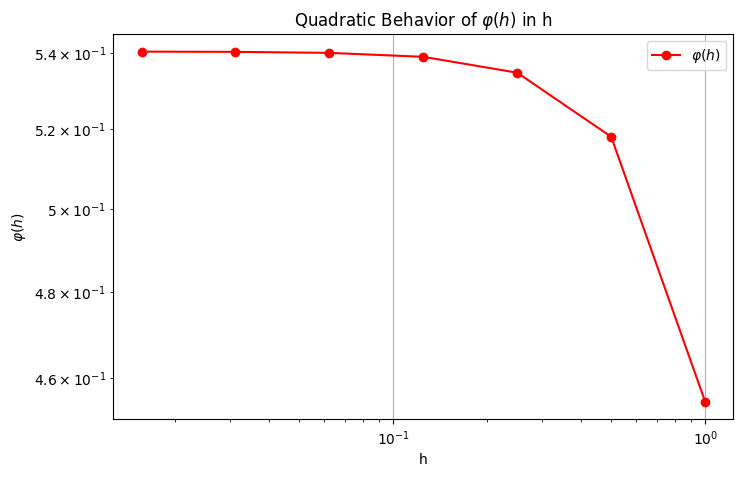

In [29]:
def f(x):
    return np.sin(x)

def phi(h, x=1.0):  
    return (f(x + h) - f(x - h)) / (2 * h)

h_values = np.array([1, 1/2, 1/4, 1/8, 1/16, 1/32, 1/64])
phi_values = np.array([phi(h) for h in h_values])

# Plot phi(h) vs h
plt.figure(figsize=(8,5))
plt.plot(h_values, phi_values, 'ro-', label=r'$\varphi(h)$')
plt.xlabel("h")
plt.ylabel(r'$\varphi(h)$')
plt.xscale("log")
plt.yscale("log")
plt.title(r"Quadratic Behavior of $\varphi(h)$ in h")
plt.legend()
plt.grid(True)
plt.show()
